# Data Analysis project on *Weather* 

## *Data Handling*  

In [74]:
## importing libraries............
import pandas as pd    
import numpy as np                   
import matplotlib.pyplot as plt                       
import seaborn as sns  

In [75]:
# READ FILE ....
df = pd.read_csv('weatherHistory.csv')
print(df.head(2))

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  


In [76]:
## data shape
df.shape       ## (96453,12)

(96453, 12)

In [77]:
# data infoo....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [78]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [79]:
## checking for null values...
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [80]:
#for percentage of null values 
(df.isnull().sum()/df.shape[0]) * 100

Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64

 * *Precip Type has some null values so, we fill it by null values.....*


In [81]:

mode_value = df['Precip Type'].mode()[0]

# Use the dictionary notation
df.fillna({'Precip Type': mode_value}, inplace=True)

# OR assign the result back to the original DataFrame column
df['Precip Type'] = df['Precip Type'].fillna(mode_value)


In [82]:
## checking for null values...
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [83]:
df.drop('Loud Cover', axis=1, inplace=True)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


* *NOW WE ROUND OFF THE VALUES OF WHOLE DATA SE*

In [84]:
df=df.round(2)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251.0,15.83,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259.0,15.83,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.38,9.38,0.89,3.93,204.0,14.96,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.29,5.94,0.83,14.10,269.0,15.83,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.76,6.98,0.83,11.04,259.0,15.83,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.02,26.02,0.43,11.00,31.0,16.10,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.58,24.58,0.48,10.09,20.0,15.55,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.04,22.04,0.56,8.98,30.0,16.10,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.52,21.52,0.60,10.53,20.0,16.10,1015.95,Partly cloudy starting in the morning.


* # OUTLIERS....

* ### *Temperature (C)*

{'whiskers': [<matplotlib.lines.Line2D at 0x1f42bbebed0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f42bbebc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f42bbeb9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f42bbea5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f42bbeac10>],
 'means': []}

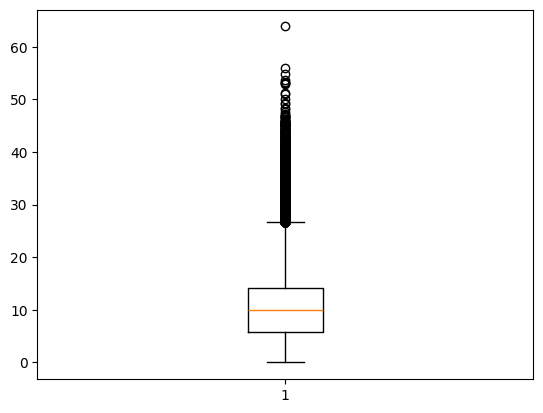

In [85]:
plt.boxplot(df['Wind Speed (km/h)'])

In [86]:
# IT HAS OUTLIERS SO SOLVING  IT....
temperature = df['Temperature (C)']

# Outliers detect karne ke liye, Interquartile Range (IQR) ka use karte hain
Q1 = temperature.quantile(0.25)
Q3 = temperature.quantile(0.75)
IQR = Q3 - Q1

# Lower bound aur upper bound define kar rahe hain
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers ko detect karna
outliers = df[(temperature < lower_bound) | (temperature > upper_bound)]

# Outliers ko replace karna (median ke sath)
df['Temperature (C)'] = np.where((temperature < lower_bound) | (temperature > upper_bound), temperature.median(), temperature)

# Data frame ko wapas CSV file mein save kar rahe hain
df.to_csv("weather_data.csv", index=True)

* ### *Humidity*

{'whiskers': [<matplotlib.lines.Line2D at 0x1f42b9ce990>,
 'caps': [<matplotlib.lines.Line2D at 0x1f42b9ce710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f42b9cead0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f42b9cf390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f42b9cf250>],
 'means': []}

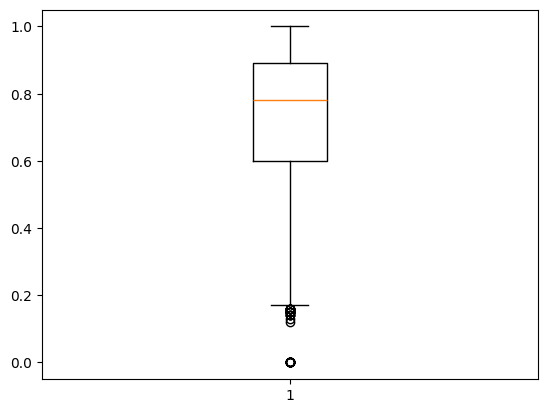

In [87]:
plt.boxplot(df['Humidity'])

In [88]:
humidity = df['Humidity']

# Outliers detect karne ke liye, Interquartile Range (IQR) ka use karte hain
Q1 = humidity.quantile(0.25)
Q3 = humidity.quantile(0.75)
IQR = Q3 - Q1

# Lower bound aur upper bound define kar rahe hain
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers ko detect karna
outliers = df[(humidity < lower_bound) | (humidity > upper_bound)]

# Outliers ko replace karna (median ke sath)
df['Humidity'] = np.where((humidity < lower_bound) | (humidity > upper_bound), humidity.median(), humidity)

# Data frame ko wapas CSV file mein save kar rahe hain
df.to_csv("weather_data.csv", index=True)

* #### *Wind Speed (km/h)*

{'whiskers': [<matplotlib.lines.Line2D at 0x1f4291b82d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4291b8550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4291b8050>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4291b87d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4291b8910>],
 'means': []}

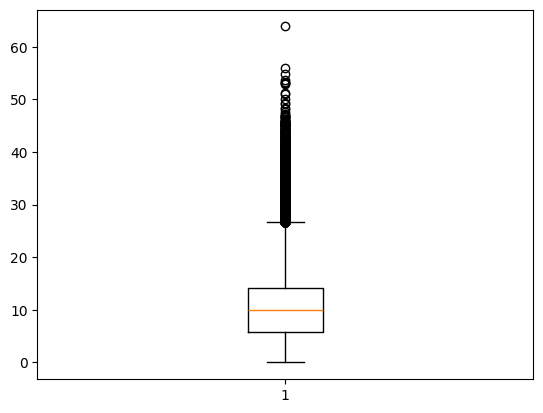

In [89]:
plt.boxplot(df['Wind Speed (km/h)'])

In [90]:
wind_speed = df['Wind Speed (km/h)']

# Outliers detect karne ke liye, Interquartile Range (IQR) ka use karte hain
Q1 = wind_speed.quantile(0.25)
Q3 = wind_speed.quantile(0.75)
IQR = Q3 - Q1

# Lower bound aur upper bound define kar rahe hain
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers ko detect karna
outliers = df[(wind_speed < lower_bound) | (wind_speed > upper_bound)]

# Outliers ko replace karna (median ke sath)
df['Wind Speed (km/h)'] = np.where((wind_speed < lower_bound) | (wind_speed > upper_bound), wind_speed.median(), wind_speed)

# Data frame ko wapas CSV file mein save kar rahe hain
df.to_csv("weather_data.csv", index=True)


* #### *Visibility (km)*

{'whiskers': [<matplotlib.lines.Line2D at 0x1f42bff3390>,
 'caps': [<matplotlib.lines.Line2D at 0x1f42bff3610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f42bff3250>],
 'medians': [<matplotlib.lines.Line2D at 0x1f42bff3890>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f42bff39d0>],
 'means': []}

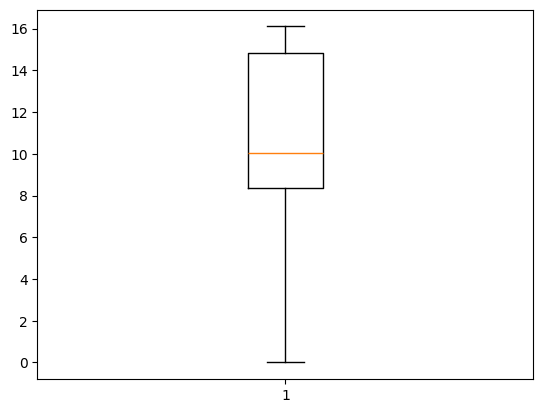

In [91]:
plt.boxplot(df['Visibility (km)'])            

    ## IT DOES NOT HAVE OUTLIERS........

* *Pressure (millibars)*

{'whiskers': [<matplotlib.lines.Line2D at 0x1f42c083b10>,
 'caps': [<matplotlib.lines.Line2D at 0x1f42c083d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f42c0839d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f42c064050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f42c064190>],
 'means': []}

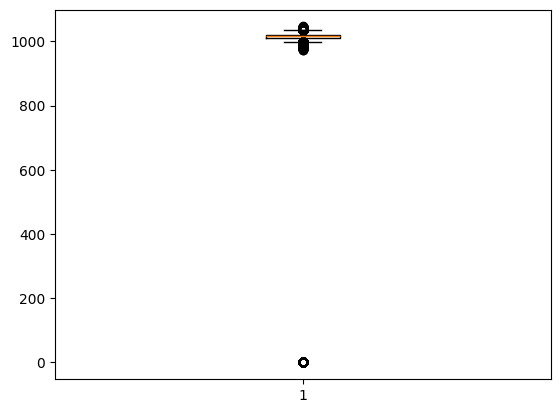

In [92]:
plt.boxplot(df['Pressure (millibars)'])

In [93]:
# Example: Pressure (millibars) column
pressure = df['Pressure (millibars)']

# Outliers detect karne ke liye, Interquartile Range (IQR) ka use karte hain
Q1 = pressure.quantile(0.25)
Q3 = pressure.quantile(0.75)
IQR = Q3 - Q1

# Lower bound aur upper bound define kar rahe hain
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers ko detect karna
outliers = df[(pressure < lower_bound) | (pressure > upper_bound)]

# Outliers ko replace karna (median ke sath)
df['Pressure (millibars)'] = np.where((pressure < lower_bound) | (pressure > upper_bound), pressure.median(), pressure)

# Data frame ko wapas CSV file mein save kar rahe hain
df.to_csv("weather_data.csv", index=True)


## NOW WE DONT HAVE NULL VALUES SO NOW WE CAN ANALYSIS IT BY GRAPHICAL REPRESENTATION....

* ## *COUNT PLOTSS..*

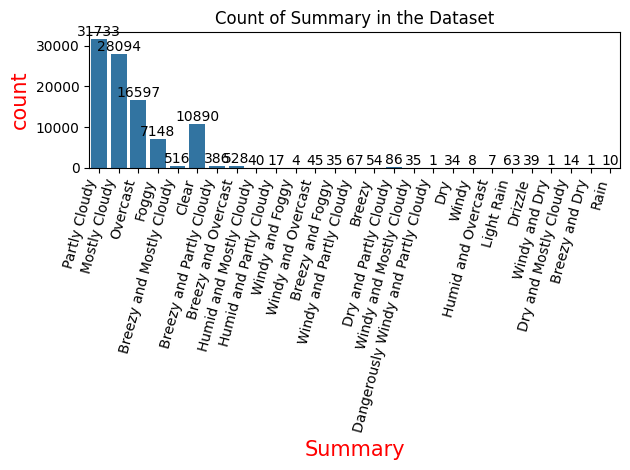

In [107]:
## PLOTING A BAR CHART FOR Summary 
ax = sns.countplot(x = 'Summary',data = df)
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title('Count of Summary in the Dataset')
    plt.xlabel('Summary',fontsize=15 , color='red')
    plt.ylabel('count',fontsize=15 , color='red')
    plt.xticks(rotation=75, ha='right')
plt.tight_layout()
# Display the plot
plt.show()



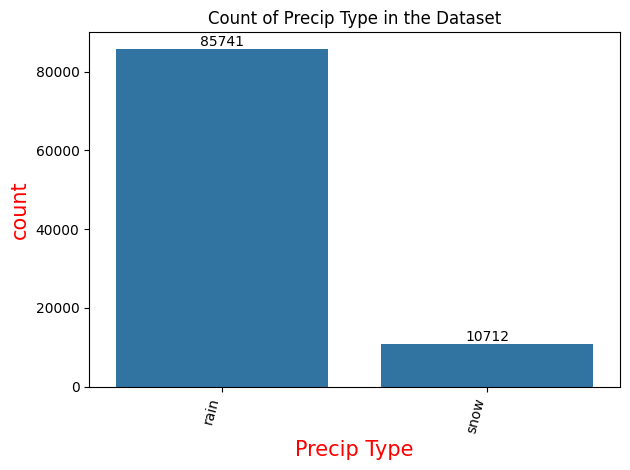

In [108]:

ax = sns.countplot(x = 'Precip Type',data = df)
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title('Count of Precip Type in the Dataset')
    plt.xlabel('Precip Type',fontsize=15 , color='red')
    plt.ylabel('count',fontsize=15 , color='red')
    plt.xticks(rotation=75, ha='right')
plt.tight_layout()
# Display the plot
plt.show()


* #### Summary:

Based on your observations and graph, weather conditions showed a higher frequency of being partially cloudy, overcast, and clear. These three conditions had the highest values in the data summary.

* #### Precipitation Type:

When comparing precipitation types, rain was more frequent than snow. Rain was the most common precipitation type*

* # AVG , MAX AND MIN 

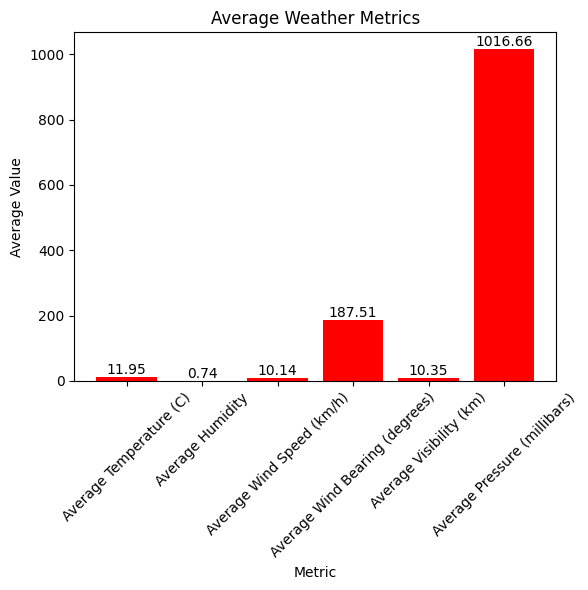

In [109]:
# Calculate averages using df
avg_temp = df['Temperature (C)'].mean()
avg_humidity = df['Humidity'].mean()
avg_wind_speed = df['Wind Speed (km/h)'].mean()
avg_wind_bearing = df['Wind Bearing (degrees)'].mean()
avg_visibility = df['Visibility (km)'].mean()
avg_pressure = df['Pressure (millibars)'].mean()

# Create a DataFrame for averages
averages = {
    'Average Temperature (C)': avg_temp,
    'Average Humidity': avg_humidity,
    'Average Wind Speed (km/h)': avg_wind_speed,
    'Average Wind Bearing (degrees)': avg_wind_bearing,
    'Average Visibility (km)': avg_visibility,
    'Average Pressure (millibars)': avg_pressure
}

avg_df = pd.DataFrame(list(averages.items()), columns=['Metric', 'Value'])

# Plotting the averages
plt.figure(figsize=(6, 6))
bars = plt.bar(avg_df['Metric'], avg_df['Value'], color='red')
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.title('Average Weather Metrics')
plt.xticks(rotation=45)
plt.tight_layout()

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Save the plot
plt.savefig('weather_averages.png')

# Show the plot
plt.show()

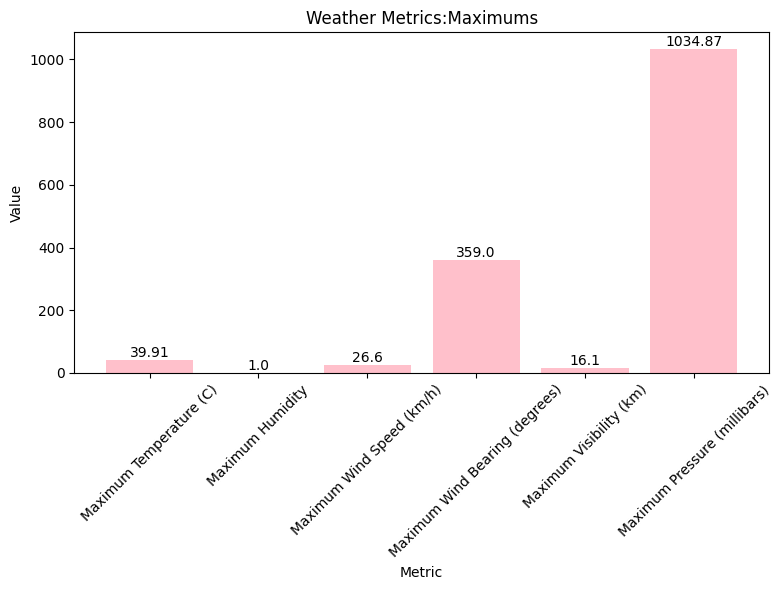

In [110]:
# Calculate maximum values using df
max_temp = df['Temperature (C)'].max()
max_humidity = df['Humidity'].max()
max_wind_speed = df['Wind Speed (km/h)'].max()
max_wind_bearing = df['Wind Bearing (degrees)'].max()
max_visibility = df['Visibility (km)'].max()
max_pressure = df['Pressure (millibars)'].max()

# Create a DataFrame for averages and maximums
metrics = {
    
    'Maximum Temperature (C)': max_temp,
    
    'Maximum Humidity': max_humidity,
    
    'Maximum Wind Speed (km/h)': max_wind_speed,
    
    'Maximum Wind Bearing (degrees)': max_wind_bearing,

    'Maximum Visibility (km)': max_visibility,

    'Maximum Pressure (millibars)': max_pressure
}

df_metrics = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Plotting the averages and maximums
plt.figure(figsize=(8, 6))
bars = plt.bar(df_metrics['Metric'], df_metrics['Value'], color='pink')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Weather Metrics:Maximums')
plt.xticks(rotation=45)
plt.tight_layout()

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


# Show the plot
plt.show()

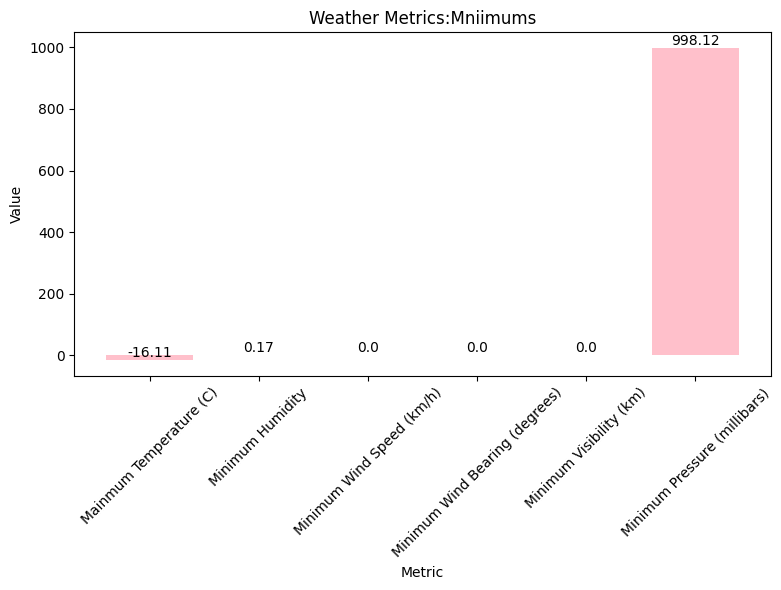

In [111]:
# Calculate minimum values using df
min_temp = df['Temperature (C)'].min()
min_humidity = df['Humidity'].min()
min_wind_speed = df['Wind Speed (km/h)'].min()
min_wind_bearing = df['Wind Bearing (degrees)'].min()
min_visibility = df['Visibility (km)'].min()
min_pressure = df['Pressure (millibars)'].min()

# Create a DataFrame for averages and minimums
metrics = {
    
    'Mainmum Temperature (C)': min_temp,
    
    'Minimum Humidity': min_humidity,
    
    'Minimum Wind Speed (km/h)': min_wind_speed,
    
    'Minimum Wind Bearing (degrees)': min_wind_bearing,

    'Minimum Visibility (km)': min_visibility,

    'Minimum Pressure (millibars)': min_pressure
}

df_metrics = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Plotting the averages and maximums
plt.figure(figsize=(8, 6))
bars = plt.bar(df_metrics['Metric'], df_metrics['Value'], color='pink')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Weather Metrics:Mniimums')
plt.xticks(rotation=45)
plt.tight_layout()

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


# Show the plot
plt.show()

* # LINECHART ...


* ##### *coversion of date*

In [112]:
# Convert the 'Formatted Date' column to datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)

# Extract the year from the 'Formatted Date' column
df['Year'] = df['Formatted Date'].dt.year

# Group the data by year and calculate the average temperature
yearly_avg_temp = df.groupby('Year')['Temperature (C)'].mean()

# Print the result
print(yearly_avg_temp)

Year
2005     0.580000
2006    11.215252
2007    12.134679
2008    12.161806
2009    12.276227
2010    11.200191
2011    11.524973
2012    12.133881
2013    11.941047
2014    12.528248
2015    12.312148
2016    11.987376
Name: Temperature (C), dtype: float64


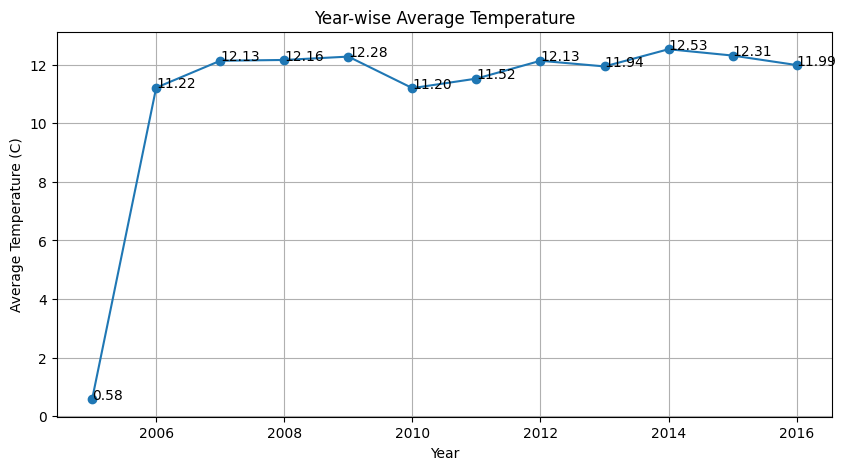

In [113]:
# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Temperature (C)')
plt.title('Year-wise Average Temperature')

# Annotate the points with the values
for i in range(len(yearly_avg_temp)):
    plt.annotate(f'{yearly_avg_temp.values[i]:.2f}', (yearly_avg_temp.index[i], yearly_avg_temp.values[i]))
plt.grid(True)
plt.show()

* ##### *for humidity*

Year
2005    0.890000
2006    0.767349
2007    0.690869
2008    0.701327
2009    0.707603
2010    0.796861
2011    0.736008
2012    0.691383
2013    0.754341
2014    0.748571
2015    0.732354
2016    0.760868
Name: Humidity, dtype: float64


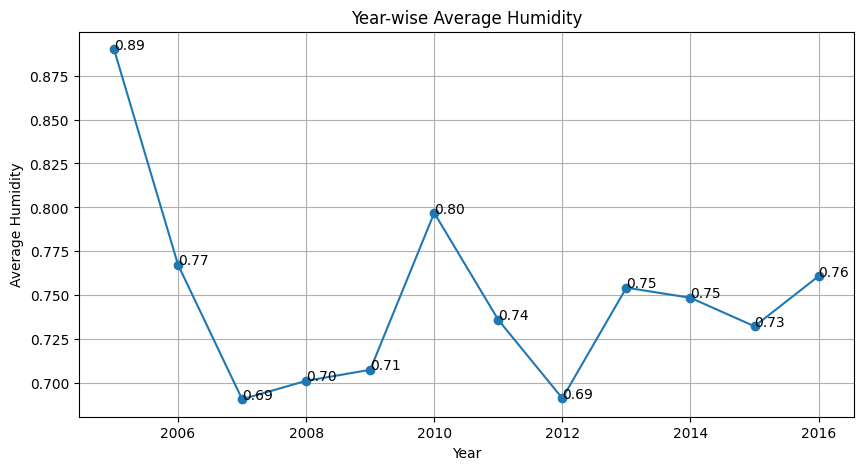

In [114]:
# Convert the 'Formatted Date' column to datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)

# Extract the year from the 'Formatted Date' column
df['Year'] = df['Formatted Date'].dt.year

# Group the data by year and calculate the average temperature
yearly_avg_Humidity = df.groupby('Year')['Humidity'].mean()

# Print the result
print(yearly_avg_Humidity)

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_Humidity.index, yearly_avg_Humidity.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Humidity')
plt.title('Year-wise Average Humidity')
plt.grid(True)

# Annotate the points with the values
for i in range(len(yearly_avg_Humidity)):
    plt.annotate(f'{yearly_avg_Humidity.values[i]:.2f}', (yearly_avg_Humidity.index[i], yearly_avg_Humidity.values[i]))
plt.show()

* ### *WIND SPEED*

Year
2005    17.110000
2006     9.646676
2007    10.121021
2008    10.530214
2009    10.574920
2010    10.356530
2011     9.398216
2012    10.428249
2013    10.236659
2014     9.897918
2015    10.001076
2016    10.303430
Name: Wind Speed (km/h), dtype: float64


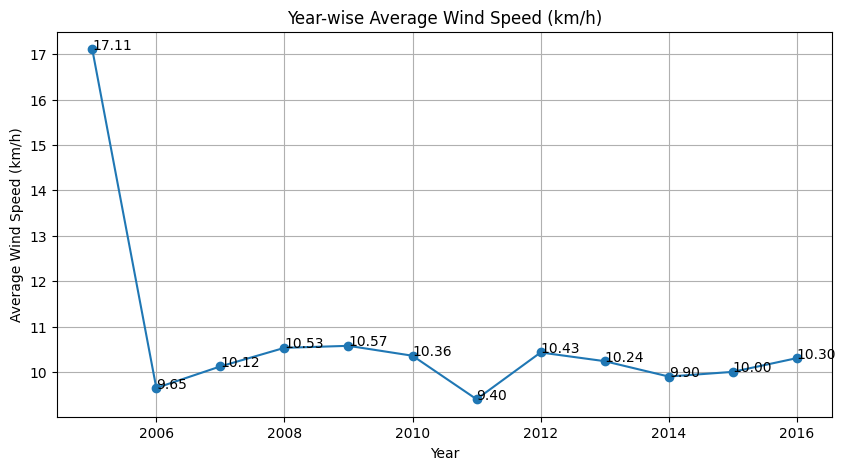

In [115]:
# Convert the 'Formatted Date' column to datetime and specify UTC
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# Extract the year from the 'Formatted Date' column
df['Year'] = df['Formatted Date'].dt.year

# Group the data by year and calculate the average wind speed
yearly_avg_wind_speed = df.groupby('Year')['Wind Speed (km/h)'].mean()

# Print the result
print(yearly_avg_wind_speed)

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_wind_speed.index, yearly_avg_wind_speed.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Wind Speed (km/h)')
plt.title('Year-wise Average Wind Speed (km/h)')
plt.grid(True)

# Annotate the points with the values
for i in range(len(yearly_avg_wind_speed)):
    plt.annotate(f'{yearly_avg_wind_speed.values[i]:.2f}', (yearly_avg_wind_speed.index[i], yearly_avg_wind_speed.values[i]))

plt.show()


Year
2005     9.980000
2006     9.757550
2007    10.408492
2008    10.267129
2009    10.001860
2010     9.140615
2011     9.508433
2012    10.362616
2013    10.892888
2014    11.320323
2015    10.913955
2016    11.249047
Name: Visibility (km), dtype: float64


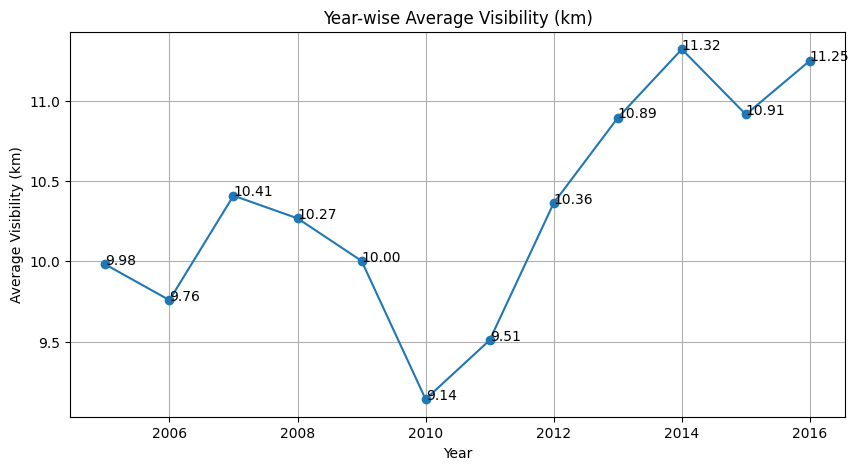

In [116]:
# Convert the 'Formatted Date' column to datetime and specify UTC
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# Extract the year from the 'Formatted Date' column
df['Year'] = df['Formatted Date'].dt.year

# Group the data by year and calculate the average visibility
yearly_avg_Visibility = df.groupby('Year')['Visibility (km)'].mean()

# Print the result
print(yearly_avg_Visibility)

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_Visibility.index, yearly_avg_Visibility.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Visibility (km)')
plt.title('Year-wise Average Visibility (km)')
plt.grid(True)

# Annotate the points with the values
for i in range(len(yearly_avg_Visibility)):
    plt.annotate(f'{yearly_avg_Visibility.values[i]:.2f}', (yearly_avg_Visibility.index[i], yearly_avg_Visibility.values[i]))

plt.show()



* # *Pressure (millibars)*

Year
2005    1016.660000
2006    1017.511347
2007    1016.923559
2008    1016.748931
2009    1015.857079
2010    1014.727538
2011    1018.576539
2012    1016.877607
2013    1015.852258
2014    1015.701205
2015    1018.103755
2016    1016.415755
Name: Pressure (millibars), dtype: float64


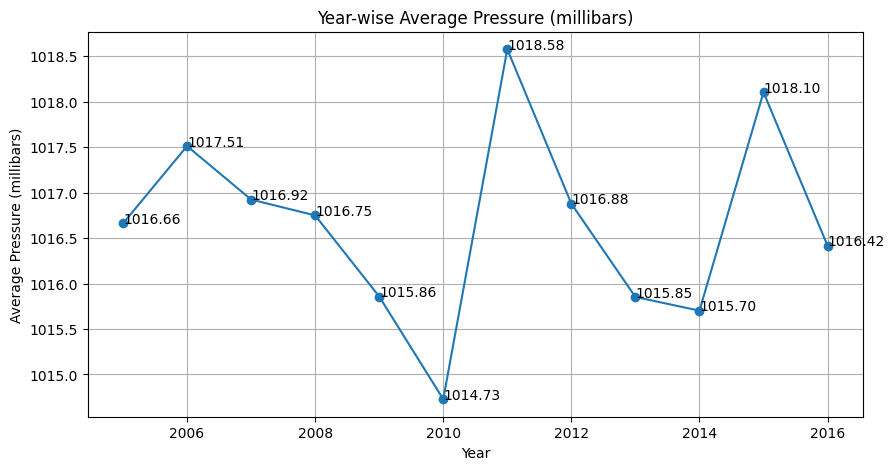

In [117]:
# Convert the 'Formatted Date' column to datetime and specify UTC
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# Extract the year from the 'Formatted Date' column
df['Year'] = df['Formatted Date'].dt.year

# Group the data by year and calculate the average pressure
yearly_avg_Pressure = df.groupby('Year')['Pressure (millibars)'].mean()

# Print the result
print(yearly_avg_Pressure)

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_Pressure.index, yearly_avg_Pressure.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Pressure (millibars)')
plt.title('Year-wise Average Pressure (millibars)')
plt.grid(True)

# Annotate the points with the values
for i in range(len(yearly_avg_Pressure)):
    plt.annotate(f'{yearly_avg_Pressure.values[i]:.2f}', (yearly_avg_Pressure.index[i], yearly_avg_Pressure.values[i]))

plt.show()


Daily Summary  Breezy and foggy starting in the evening.  \
Year                                                       
2005                                                 0.0   
2006                                                 0.0   
2007                                                 0.0   
2008                                                 0.0   
2009                                                 0.0   
2010                                                 0.0   
2011                                                 0.0   
2012                                                 0.0   
2013                                                24.0   
2014                                                 0.0   
2015                                                 0.0   
2016                                                 0.0   

Daily Summary  Breezy and foggy until morning.  \
Year                                             
2005                                       0.0   
2006     

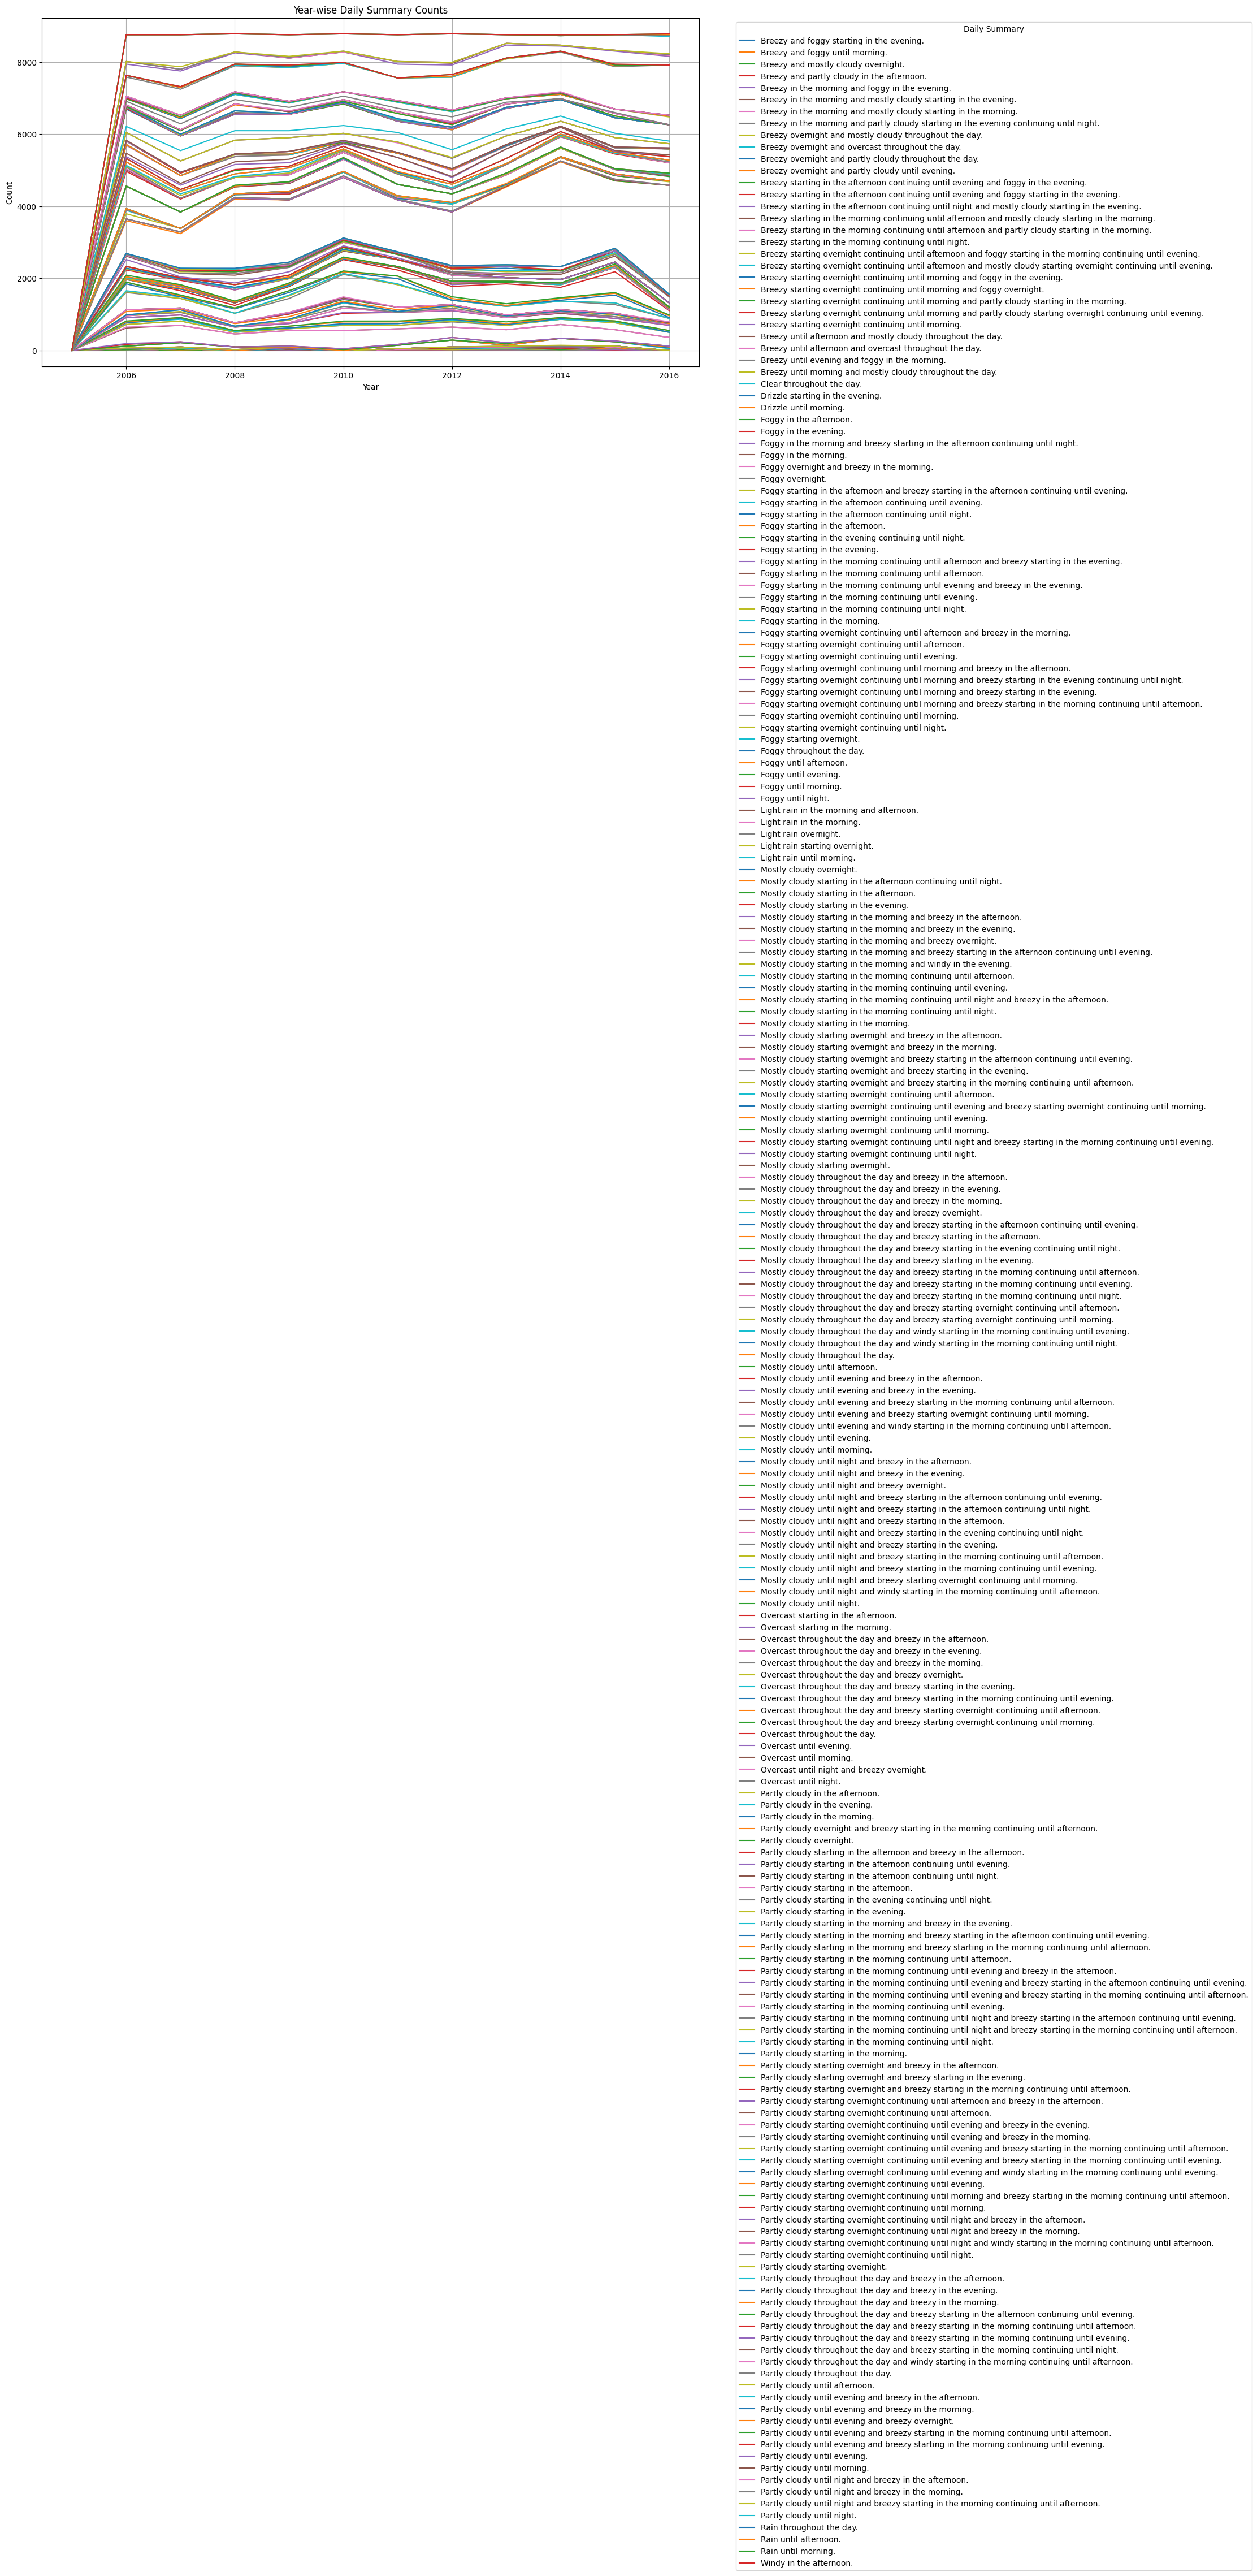

In [121]:
# Convert the 'Formatted Date' column to datetime and specify UTC
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# Extract the year from the 'Formatted Date' column
df['Year'] = df['Formatted Date'].dt.year

# Group the data by year and 'Daily Summary' and count occurrences
daily_summary_counts = df.groupby(['Year', 'Daily Summary']).size().unstack().fillna(0)

# Print the result
print(daily_summary_counts)

# Plot the bar chart
daily_summary_counts.plot(kind='line', stacked=True, figsize=(15, 8))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year-wise Daily Summary Counts')
plt.legend(title='Daily Summary', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


* relation between avg wind speed and precip type ..

C:\Users\HP\AppData\Local\Temp\ipykernel_19760\1503945093.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, average_wind_speed[i], f'{average_wind_speed[i]:.2f}', ha='center', va='bottom')


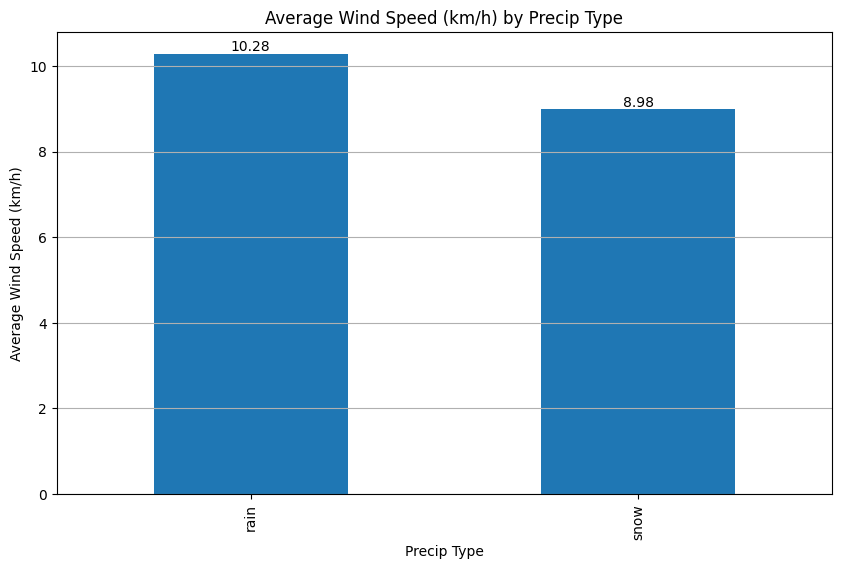

In [127]:
# Average Wind Speed (km/h) ko Precip Type ke hisaab se group karna
average_wind_speed = df.groupby('Precip Type')['Wind Speed (km/h)'].mean()

# Bar chart plot karna
plt.figure(figsize=(10, 6))
average_wind_speed.plot(kind='bar')
plt.xlabel('Precip Type')
plt.ylabel('Average Wind Speed (km/h)')
plt.title('Average Wind Speed (km/h) by Precip Type')
plt.grid(axis='y')

# Values ko bar chart mein dikhana
for i in range(len(average_wind_speed)):
    plt.text(i, average_wind_speed[i], f'{average_wind_speed[i]:.2f}', ha='center', va='bottom')

plt.show()
